#**Predictive Analysis of Heart Attack Using Medical Data**

###**NAMA       : LENI GUSTIA**
###**COHORT ID  :322D5X1820**

## **1. Import Library**

In [103]:
# Mengimpor library dasar untuk manipulasi data dan visualisasi
import pandas as pd                         # Digunakan untuk manipulasi dan analisis data dalam bentuk tabel (DataFrame)
import numpy as np                          # Digunakan untuk operasi numerik seperti array dan perhitungan matematis
import seaborn as sns                       # Digunakan untuk visualisasi data statistik yang lebih interaktif dan informatif
import matplotlib.pyplot as plt             # Digunakan untuk membuat visualisasi data seperti grafik

# Untuk pembuatan gradasi warna pada visualisasi
from matplotlib.colors import LinearSegmentedColormap

# Mengimpor modul untuk preprocessing data
from sklearn.preprocessing import OneHotEncoder, StandardScaler   # OneHotEncoder untuk mengubah variabel kategorik, StandardScaler untuk normalisasi

# Mengimpor fungsi untuk membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Mengimpor algoritma machine learning yang akan digunakan
from sklearn.tree import DecisionTreeClassifier                    # Algoritma Decision Tree untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier                # Algoritma Random Forest untuk klasifikasi
from sklearn.naive_bayes import GaussianNB
# Mengimpor metrik evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **2. Data Loading**

In [104]:
data_leni = pd.read_csv('Medicaldataset.csv')
data_leni.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


## **3. Eksplorasi Data**

### 3.1. Deskripsi Variabel

In [105]:
data_leni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


**Insight**:
- Berdasarkan hasil eksplorasi awal, dataset tidak memiliki nilai yang hilang (missing value), sehingga dapat langsung digunakan untuk keperluan analisis statistik dan pemodelan tanpa perlu dilakukan pembersihan data tambahan.

In [106]:
#Analisis statistik deskriptif pada dataset
data_leni.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


### 3.2. Menangani Missing Value dan Outlier

Melihat apakah terdapat missing values pada dataset

In [107]:
data_leni.isnull().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


**Insight**
- Berdasarkan output di atas, dapat dilihat bahawa tidak terdapat missing value

### 3.3. Univariate Analysis

Visualisasi distibusi nilai kolom numerik.

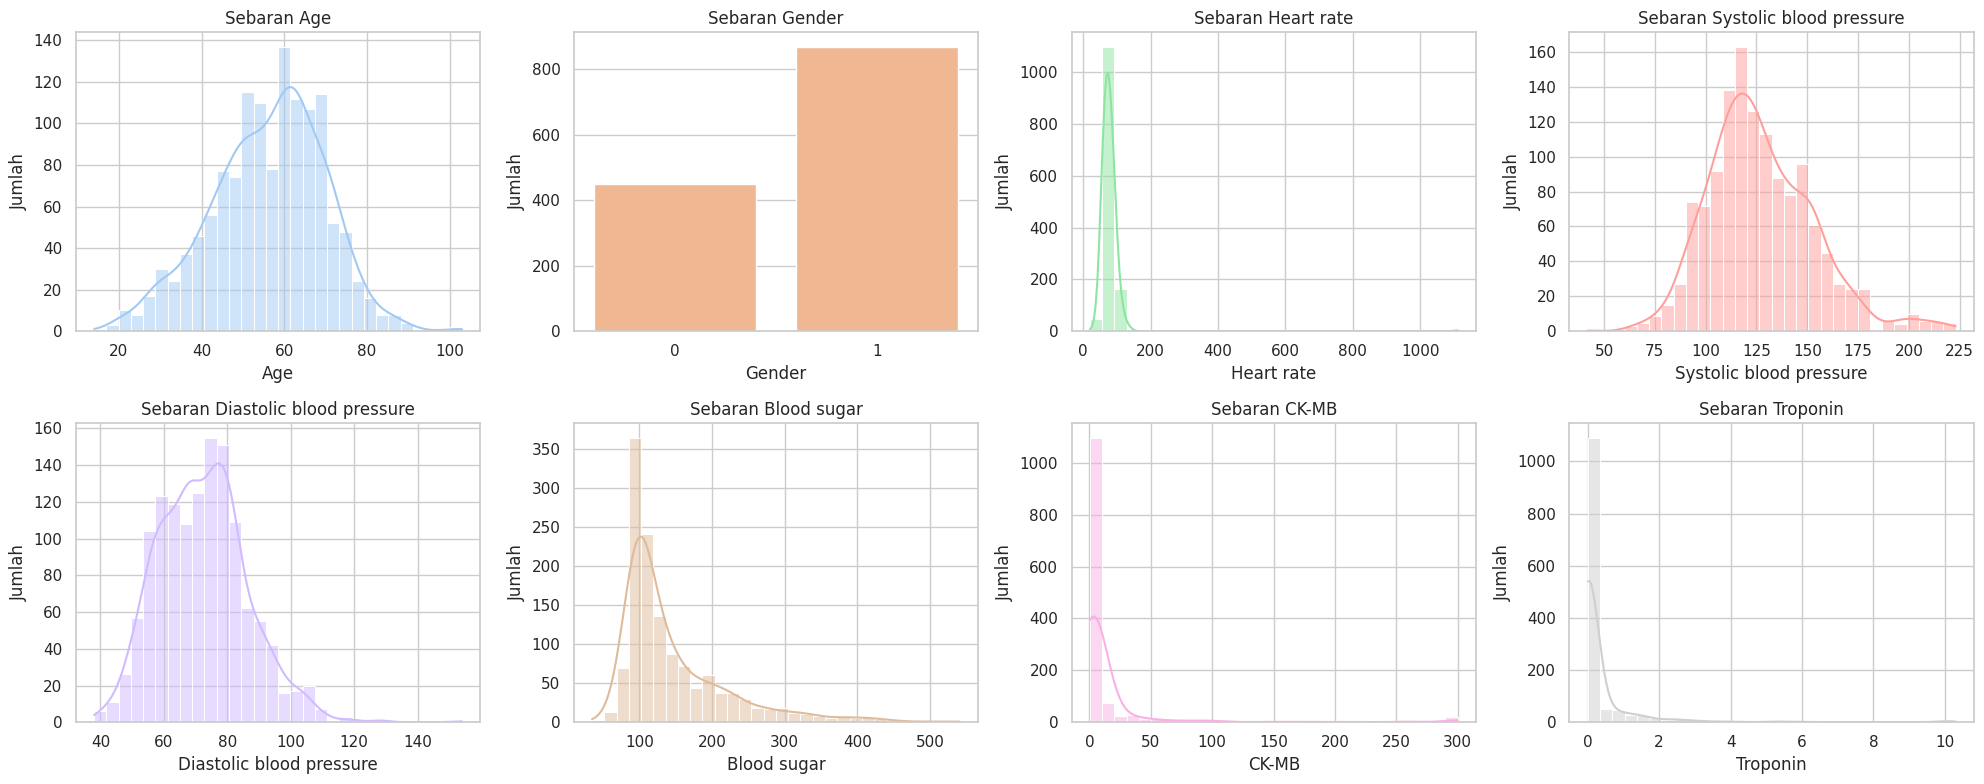

In [108]:
# Daftar variabel numerik yang akan dianalisis
kolom_numerik = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
                 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

# Ukuran layout
jumlah_baris, jumlah_kolom = 2, 4
fig, axes = plt.subplots(nrows=jumlah_baris, ncols=jumlah_kolom, figsize=(20, 8))
palette_warna = sns.color_palette("pastel", len(kolom_numerik))

# Looping melalui setiap kolom dan subplot
for idx, nama_kolom in enumerate(kolom_numerik):
    baris = idx // jumlah_kolom
    kolom = idx % jumlah_kolom
    ax = axes[baris, kolom]

    if data_leni[nama_kolom].nunique() > 10:
        sns.histplot(data_leni[nama_kolom].dropna(), bins=30, kde=True, ax=ax, color=palette_warna[idx])
    else:
        sns.countplot(x=data_leni[nama_kolom], ax=ax, color=palette_warna[idx])

    ax.set_title(f'Sebaran {nama_kolom}')
    ax.set_xlabel(nama_kolom)
    ax.set_ylabel('Jumlah')

plt.tight_layout()
plt.show()


###**Insight**
- Age: Terdistribusi normal, dengan puncak di usia sekitar 60 tahun.
- Gender: Lebih banyak pasien laki-laki (label 1) dibanding perempuan (label 0).
- Heart Rate: Distribusi heart rate terkonsentrasi di kisaran normal (sekitar 60–120 bpm). Namun, terdapat outlier ekstrem yang melebihi 1000 bpm, kemungkinan merupakan kesalahan data.
- Systolic Blood Pressure: Distribusi mendekati normal, dengan puncak di sekitar 120 (sistolik) dan 75–80 (diastolik).Memiliki distribusi yang relatif simetris, dengan sebagian besar nilai berada antara 100–140 mmHg, menunjukkan tekanan darah sistolik umum pada pasien.
- Diastolic Blood Pressure: Distribusinya agak miring ke kanan, dengan nilai dominan berkisar antara 60–90 mmHg. Nilai ekstrem tampak sebagai outlier.
- Blood Sugar: Distribusinya sangat right-skewed (condong ke kanan) dengan banyak nilai terkonsentrasi di bawah 150 mg/dL. Terdapat outlier hingga lebih dari 500 mg/dL.
- CK-MB : Sebagian besar nilai CK-MB rendah, namun distribusinya sangat miring ke kanan, menandakan hanya sedikit kasus dengan peningkatan signifikan enzim ini.
- Troponin: Hampir seluruh nilai berada di kisaran rendah (sekitar 0), namun terdapat outlier tinggi. Hal ini menunjukkan sebagian besar pasien tidak mengalami peningkatan troponin yang signifikan, tapi ada beberapa indikasi kerusakan otot jantung.

### 3.4. Multivariate Analysis

1. Visualisasi rerata kasus serangan jantung terhadap fitur lainnya

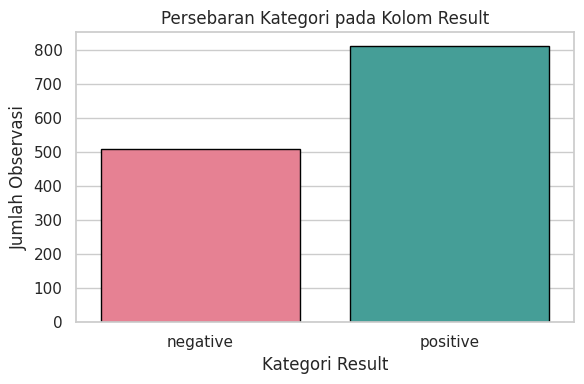

In [109]:
fig, ax = plt.subplots(figsize=(6, 4))

# Visualisasi distribusi Result
sns.countplot(
    data=data_leni,
    x='Result',
    hue='Result',
    ax=ax,
    palette='husl',
    edgecolor='black',
    legend=False
)

# Penyesuaian tampilan
ax.set_title("Persebaran Kategori pada Kolom Result")
ax.set_xlabel("Kategori Result")
ax.set_ylabel("Jumlah Observasi")

plt.tight_layout()
plt.show()

**Insight**
- Visualisasi ini menggambarkan distribusi dua kategori pada variabel Result. Terlihat bahwa jumlah individu dengan label positive (mengalami serangan jantung) lebih tinggi dibandingkan dengan label negative (tidak mengalami serangan jantung). Kelas positive mendominasi dengan frekuensi yang lebih besar, sedangkan kelas negative tercatat lebih sedikit. Ketimpangan ini menunjukkan adanya ketidakseimbangan kelas dalam dataset, yang merupakan hal umum pada kasus prediksi penyakit, di mana pasien yang mengalami kondisi tertentu (seperti serangan jantung) biasanya lebih sedikit dibandingkan yang tidak.

2. Visualisasi keterkaitan antar variabel

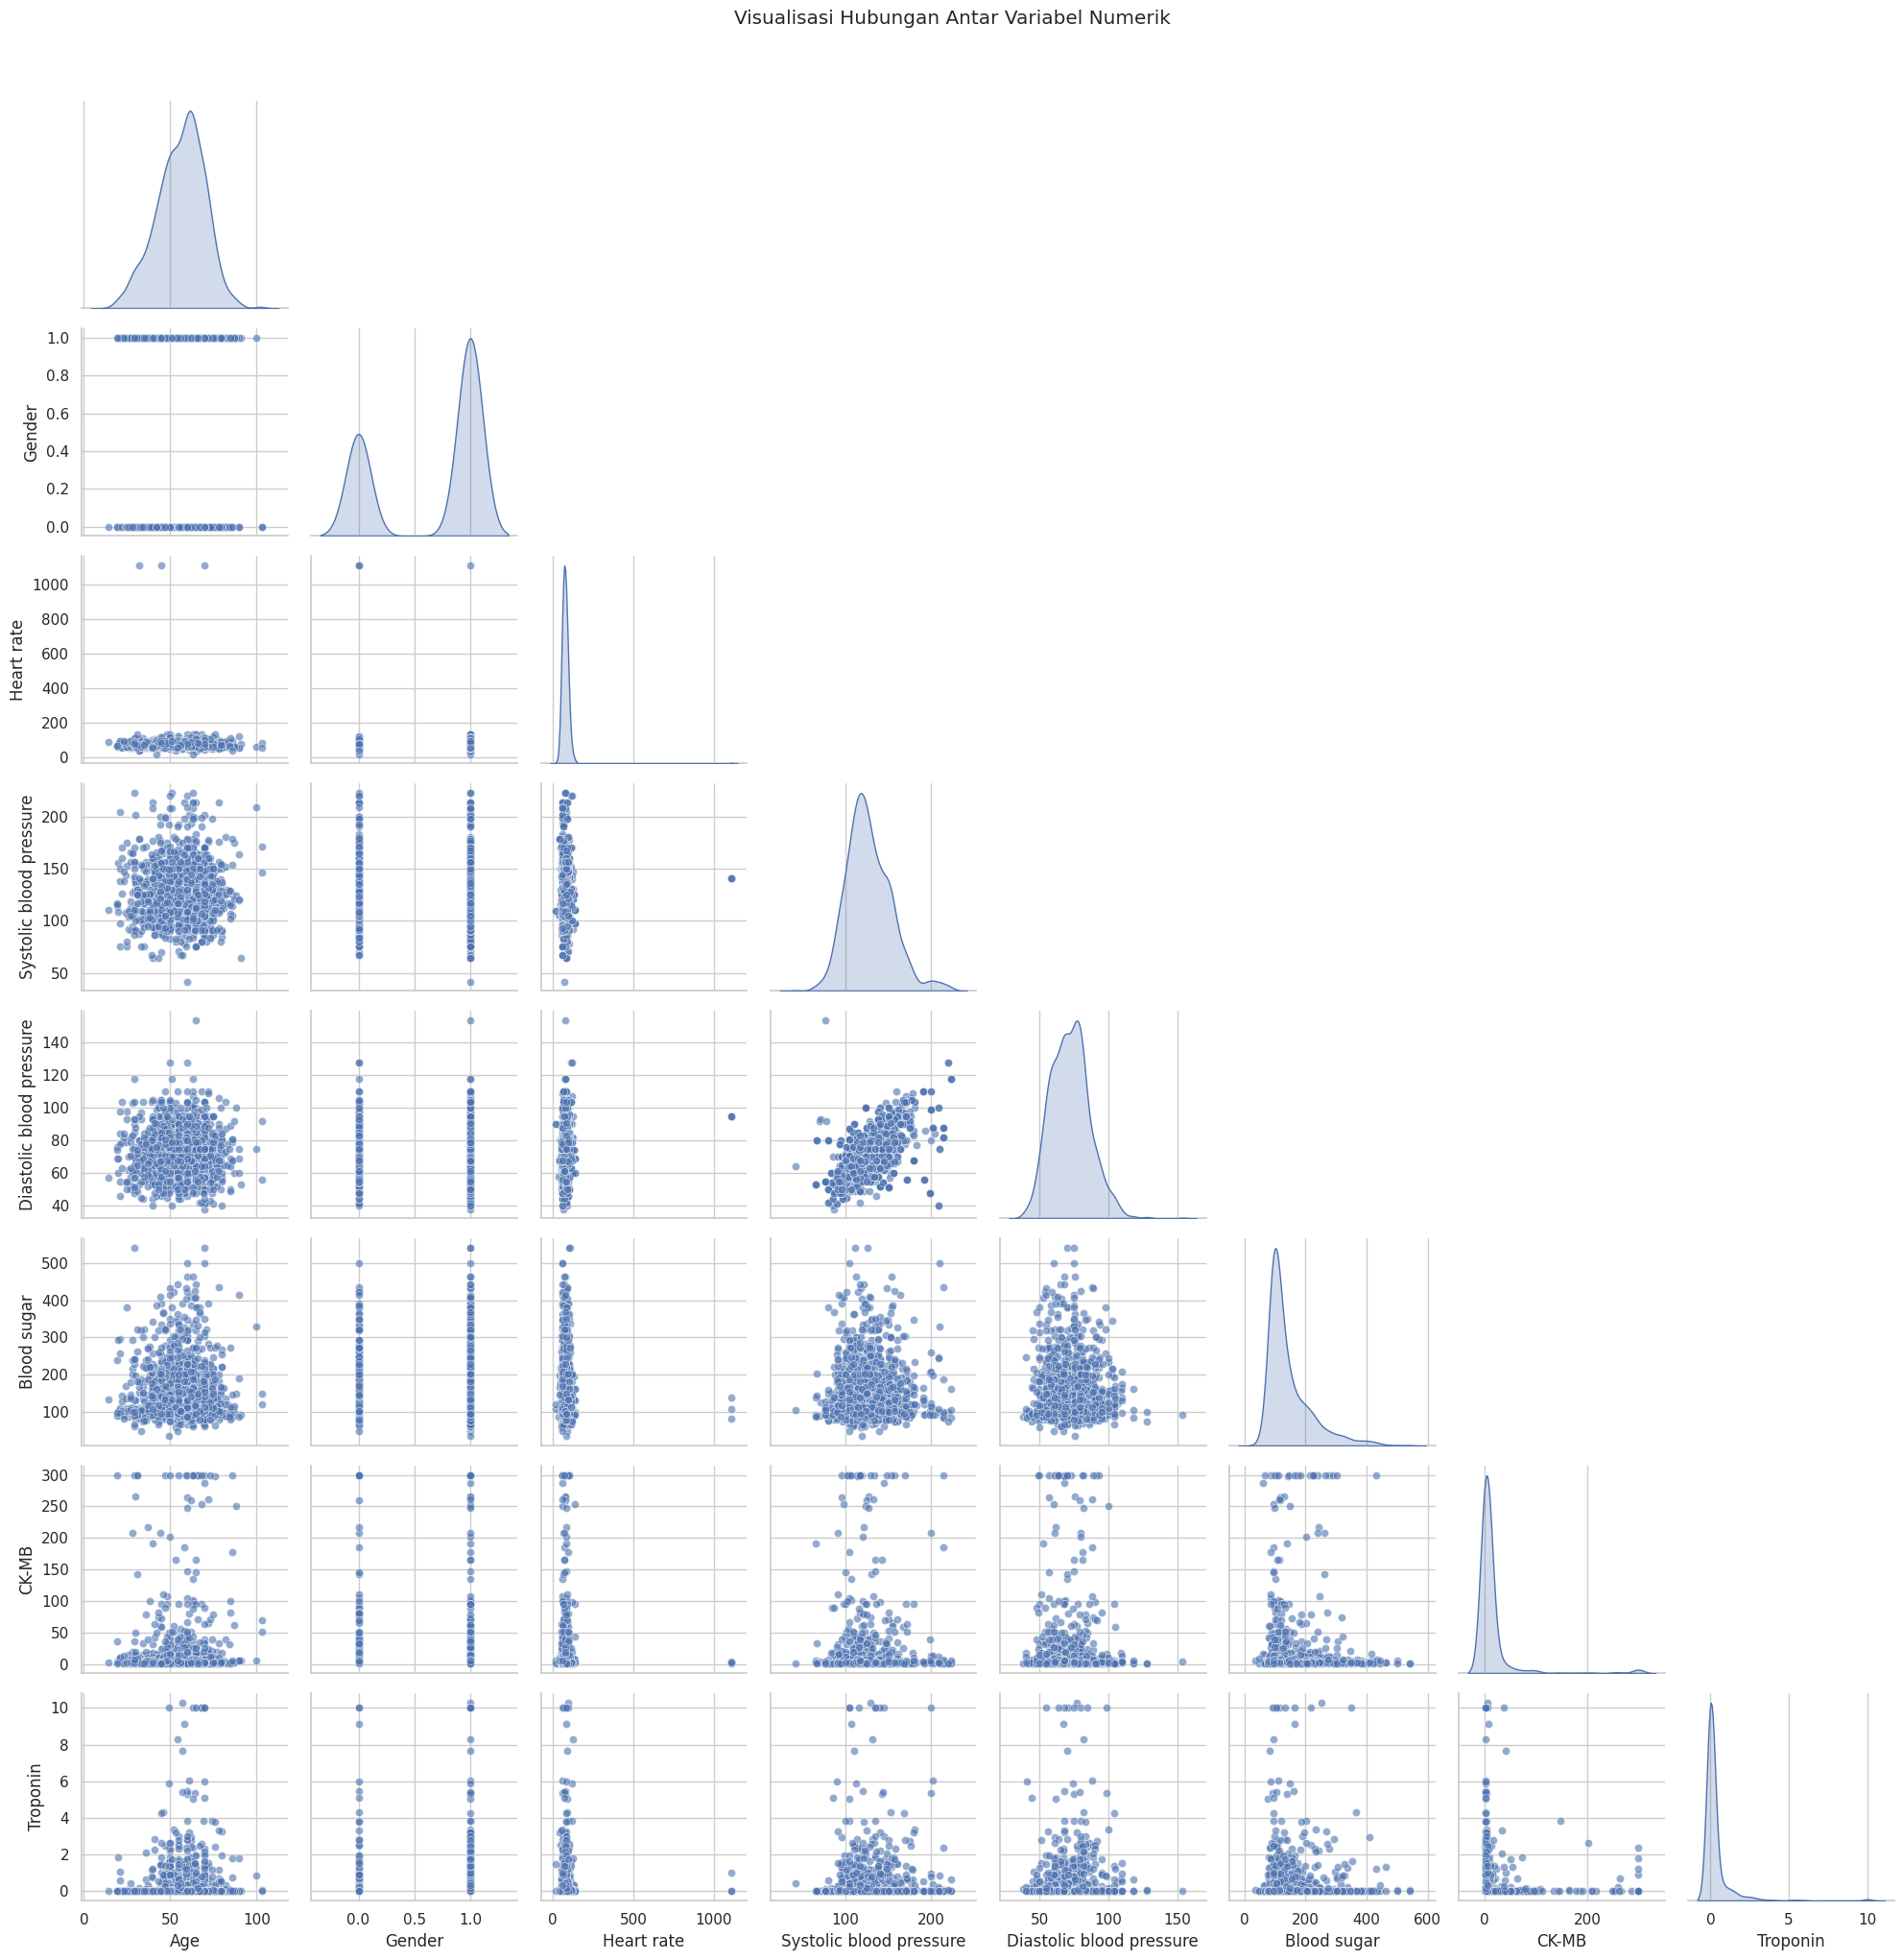

In [110]:
# Kolom numerik untuk pairplot
fitur_diabetes = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
                 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

# Membuat pairplot
gbr = sns.pairplot(
    data=data_leni[fitur_diabetes],
    kind='scatter',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.6, 's': 35, 'edgecolor': 'w'}
)

# Menampilkan plot
gbr.fig.suptitle("Visualisasi Hubungan Antar Variabel Numerik", y=1.02)
plt.tight_layout()
plt.show()


**Insight**
- Visualisasi KDE memperlihatkan pola hubungan antar fitur dalam dataset. Scatter plot di bawah diagonal menunjukkan sebaran data antar pasangan variabel, sedangkan diagonal menampilkan distribusi masing-masing variabel. Fitur seperti Tekanan Darah dan Denyut Jantung menunjukkan distribusi yang mendekati normal, menandakan pola yang stabil. Gula Darah dan Troponin memiliki distribusi yang terpusat, menunjukkan variasi nilai yang sempit. Sementara itu, variabel biner seperti Jenis Kelamin memperlihatkan distribusi yang terpisah dan tidak memiliki korelasi kuat dengan fitur lain.

3. Visualisasi correlation matrix

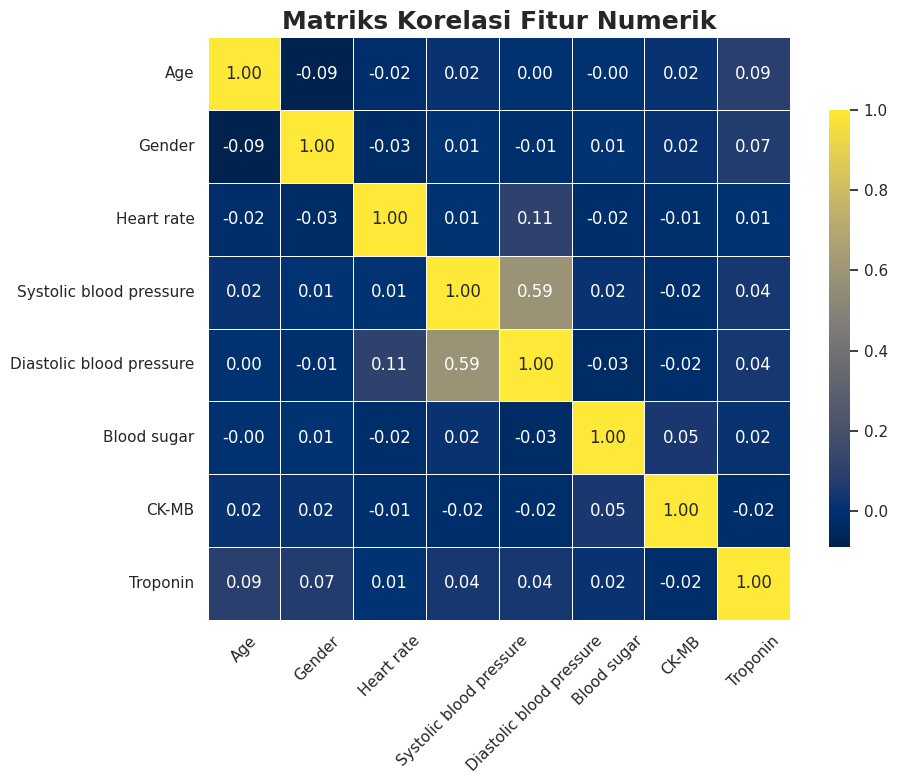

In [111]:
# Menampilkan matriks korelasi antar kolom numerik dalam dataset
fitur_numerik = data_leni.select_dtypes(include=['number']).columns.tolist()
matriks_korelasi = data_leni[fitur_numerik].corr().round(2)

# Membuat visualisasi heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    matriks_korelasi,
    ax=ax,
    annot=True,
    cmap='cividis',
    fmt='.2f',
    linewidths=0.4,
    square=True,
    cbar_kws={'shrink': 0.75}
)

ax.set_title("Matriks Korelasi Fitur Numerik", fontsize=18, fontweight='bold')
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', labelrotation=0)

plt.tight_layout()
plt.show()


**Insight**
- Systolic Blood Pressure dan Diastolic Blood Pressure memiliki korelasi cukup kuat sebesar 0.59, menandakan adanya hubungan yang erat antara kedua jenis tekanan darah.

- Age menunjukkan korelasi lemah dengan Troponin (0.09) dan hampir tidak berkorelasi dengan Systolic Blood Pressure (0.02), yang mengindikasikan pengaruh usia terhadap beberapa indikator jantung cukup terbatas.

- Blood Sugar memiliki korelasi yang sangat rendah dengan seluruh fitur lainnya, menandakan bahwa variabel ini berdiri sendiri dan tidak banyak dipengaruhi oleh faktor lain dalam dataset.

- Heart Rate dan Diastolic Blood Pressure menunjukkan korelasi rendah (0.11), namun keduanya tetap relevan sebagai indikator kondisi jantung.

- CK-MB memiliki korelasi rendah dengan semua variabel lain, menunjukkan bahwa nilai enzim ini bervariasi secara independen dibandingkan fitur lainnya.

## **4. Data Preparation**

### 4.1 Handling Oulier

Boxplot digunakan untuk mengidentifikasi nilai-nilai pencilan (outlier) dalam data. Nilai yang berada di luar batas normal (di atas atau di bawah whisker) dianggap sebagai outlier dan perlu diperhatikan karena dapat memengaruhi hasil analisis.

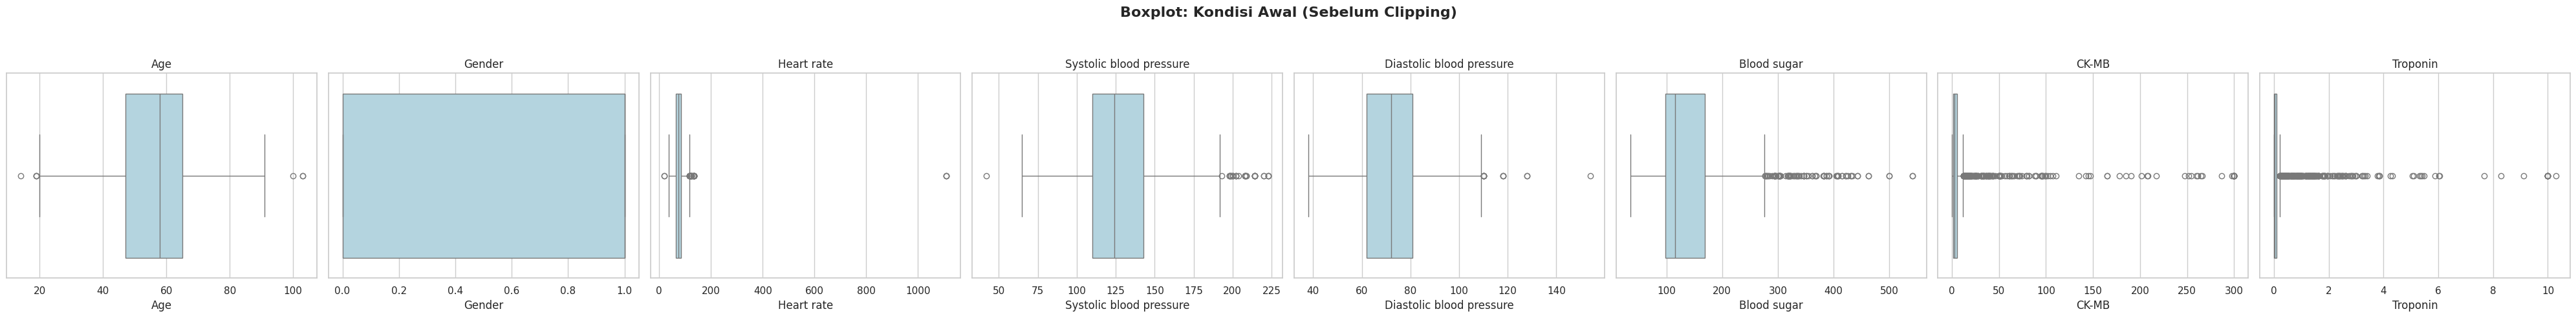

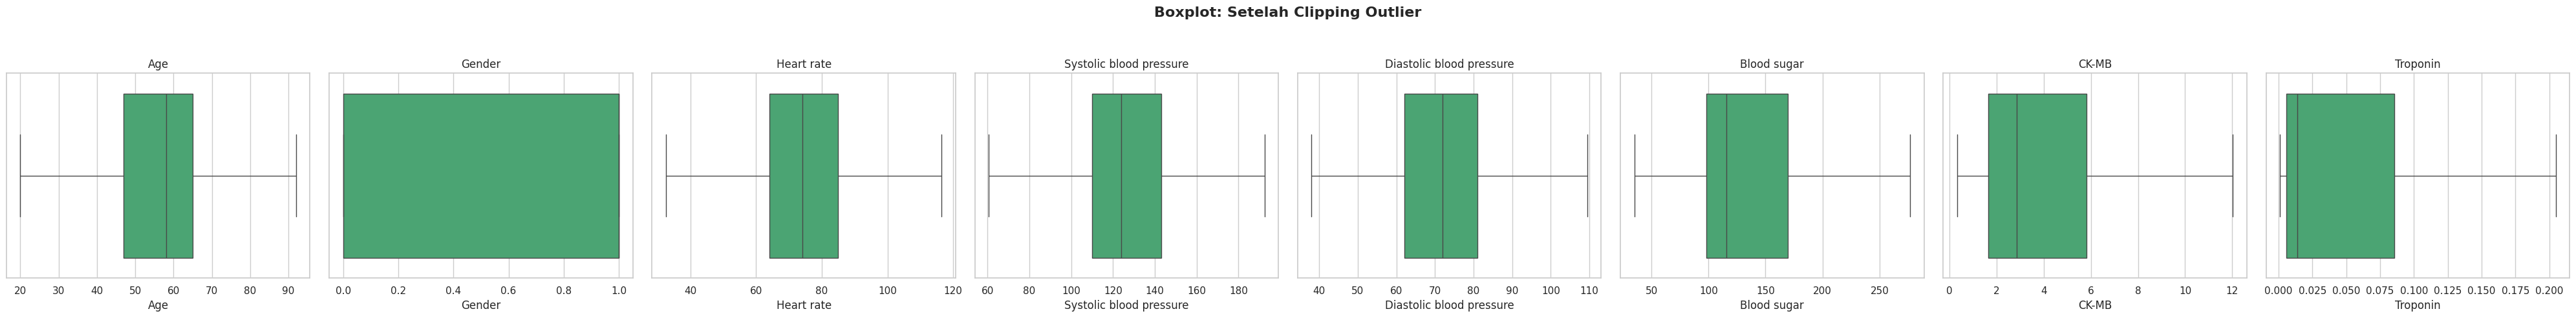

In [112]:
# Variabel numerik
variabel_numerik = ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
                    'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

# Salin data asli sebelum pemangkasan outlier
data_sebelum_clip = data_leni[variabel_numerik].copy()
daftar_outlier = {}

# Clipping outlier dengan metode IQR
for fitur in variabel_numerik:
    kuartil_1 = data_leni[fitur].quantile(0.25)
    kuartil_3 = data_leni[fitur].quantile(0.75)
    iqr = kuartil_3 - kuartil_1
    lower = kuartil_1 - 1.5 * iqr
    upper = kuartil_3 + 1.5 * iqr

    # Simpan data outlier
    daftar_outlier[fitur] = data_leni.loc[(data_leni[fitur] < lower) | (data_leni[fitur] > upper), fitur]

    # Lakukan clipping
    data_leni[fitur] = np.clip(data_leni[fitur], lower, upper)

# Boxplot sebelum pemangkasan
fig_before, axis_before = plt.subplots(nrows=1, ncols=len(variabel_numerik), figsize=(5 * len(variabel_numerik), 5))
fig_before.suptitle("Boxplot: Kondisi Awal (Sebelum Clipping)", fontsize=16, fontweight='bold')

for i, fitur in enumerate(variabel_numerik):
    sns.boxplot(x=data_sebelum_clip[fitur], ax=axis_before[i], color='lightblue')
    axis_before[i].set_title(fitur)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

# Boxplot setelah pemangkasan
fig_after, axis_after = plt.subplots(nrows=1, ncols=len(variabel_numerik), figsize=(5 * len(variabel_numerik), 5))
fig_after.suptitle("Boxplot: Setelah Clipping Outlier", fontsize=16, fontweight='bold')

for i, fitur in enumerate(variabel_numerik):
    sns.boxplot(x=data_leni[fitur], ax=axis_after[i], color='mediumseagreen')
    axis_after[i].set_title(fitur)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

### 4.2. Standarisasi Fitur

Standarisasi dilakukan dengan StandardScaler untuk menyesuaikan skala setiap fitur ke rentang yang seragam, sehingga memudahkan proses analisis dan memungkinkan model bekerja lebih optimal, sekaligus melihat perbedaan nilai sebelum dan sesudah transformasi.

In [113]:
# Variabel numerik pada data_leni
fitur_numerik = ['Age', 'Heart rate', 'Systolic blood pressure',
                    'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']

scaler = StandardScaler()
data_leni[fitur_numerik] = scaler.fit_transform(data_leni[fitur_numerik])

data_leni.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,0.577235,1,-0.670969,1.325773,0.787875,0.316482,-0.696465,-0.593247,negative
1,-2.595152,1,1.220652,-1.152207,-1.907768,2.287105,0.597906,1.863325,positive
2,-0.086753,1,-0.806085,1.325773,0.350743,2.173172,-0.646782,-0.707951,negative
3,0.577235,1,-0.400738,-0.272924,-1.252071,2.173172,1.978569,0.808687,positive
4,-0.086753,1,-0.806085,-0.592663,-0.523519,2.287105,-0.884737,-0.707951,negative


### 4.3. Spliting Data

Dataset dibagi menjadi data latih dan data uji dengan proporsi 80:20, di mana 20% data digunakan untuk pengujian dan 80% untuk pelatihan model.

In [114]:
# Pisahkan fitur dan target
X = data_leni.drop(columns=["Result"])
y = data_leni["Result"]

# Split data menjadi train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1055, 8)
y_train shape: (1055,)
X_test shape: (264, 8)
y_test shape: (264,)


## **5. Membangun Model Klasifikasi**

### 5.1. Decision Tree

In [115]:
# Membangun dan melatih model Decision Tree
Model_Decision_Tree = DecisionTreeClassifier(random_state=42)
Model_Decision_Tree.fit(X_train, y_train)
# Memprediksi hasil pada data uji
y_pred_dt = Model_Decision_Tree.predict(X_test)

### 5.2. Random Forest

In [116]:
# Membangun dan melatih model Random Forest
Model_Random_Forest = RandomForestClassifier(n_estimators=100, random_state=42)
Model_Random_Forest.fit(X_train, y_train)
# Memprediksi hasil pada data uji
y_pred_rf = Model_Random_Forest.predict(X_test)

### 5.3. Naive Bayes

In [117]:
# Membangun dan melatih model Naive Bayes
Model_Naive_Bayes = GaussianNB()
Model_Naive_Bayes.fit(X_train, y_train)
# Memprediksi hasil pada data uji
y_pred_nb = Model_Naive_Bayes.predict(X_test)

## **6. Evaluasi Model**

### 6.1. Decision Tree

Evaluasi model Decision Tree.

Akurasi Decision Tree: 0.9773

Classification Report Decision Tree:
               precision    recall  f1-score   support

    negative       0.97      0.97      0.97       101
    positive       0.98      0.98      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



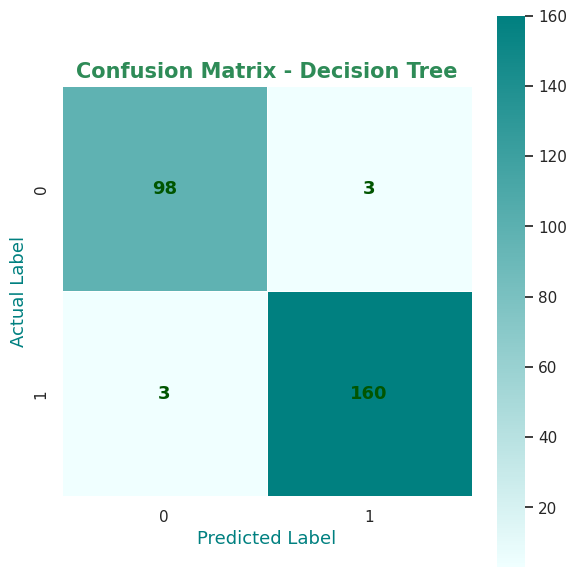

In [118]:
print(f"Akurasi Decision Tree: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report Decision Tree:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Membuat colormap custom
colors_dt = ["#F0FFFF", "#008080"]
cmap_dt = LinearSegmentedColormap.from_list("custom_seagreen", colors_dt)

plt.figure(figsize=(6,6))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt='d',
    cmap=cmap_dt,
    linewidths=0.7,
    linecolor='white',
    cbar=True,
    square=True,
    annot_kws={"size": 13, "weight": "bold", "color": "#005500"}  # warna teks hijau tua agar kontras
)
plt.title("Confusion Matrix - Decision Tree", fontsize=15, fontweight='bold', color='#2E8B57')
plt.xlabel("Predicted Label", fontsize=13, color='#008080')
plt.ylabel("Actual Label", fontsize=13, color='#008080')
plt.tight_layout()
plt.show()

### 6.2. Random Forest

Evaluasi model Random Forest.

Akurasi Random Forest: 0.9811

Classification Report Random Forest:
               precision    recall  f1-score   support

    negative       0.98      0.97      0.98       101
    positive       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



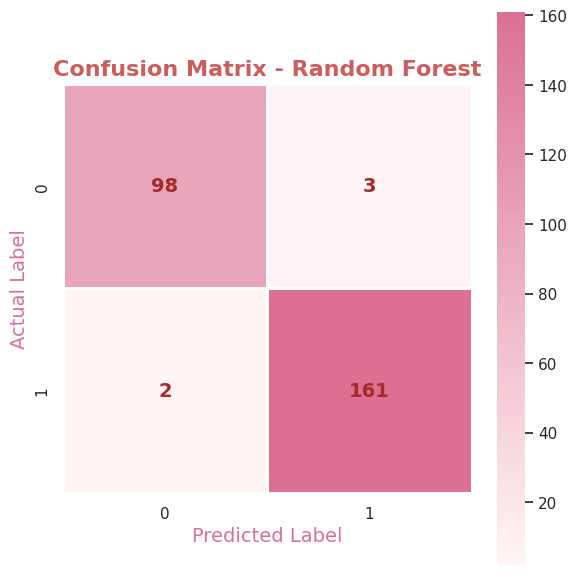

In [119]:
print(f"Akurasi Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report Random Forest:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)

# Custom colormap dari putih ke pink Indian Red
colors_rf = ["#FFF5F5", "#DB7093"]  # lebih soft ke gradasi pink-merah
cmap_rf = LinearSegmentedColormap.from_list("custom_indianred", colors_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap=cmap_rf,
    linewidths=0.8,
    linecolor='white',
    cbar=True,
    square=True,
    annot_kws={"size": 14, "weight": "bold", "color": "#A52A2A"}  # sedikit lebih soft dari darkred
)
plt.title("Confusion Matrix - Random Forest", fontsize=16, fontweight='bold', color='#CD5C5C')
plt.xlabel("Predicted Label", fontsize=14, color='#DB7093')
plt.ylabel("Actual Label", fontsize=14, color='#DB7093')
plt.tight_layout()
plt.show()


### 6.3. Naive Bayes

Evaluasi model Naive Bayes.

Akurasi Naive Bayes: 0.8712

Classification Report Naive Bayes:
               precision    recall  f1-score   support

    negative       0.78      0.93      0.85       101
    positive       0.95      0.83      0.89       163

    accuracy                           0.87       264
   macro avg       0.86      0.88      0.87       264
weighted avg       0.88      0.87      0.87       264



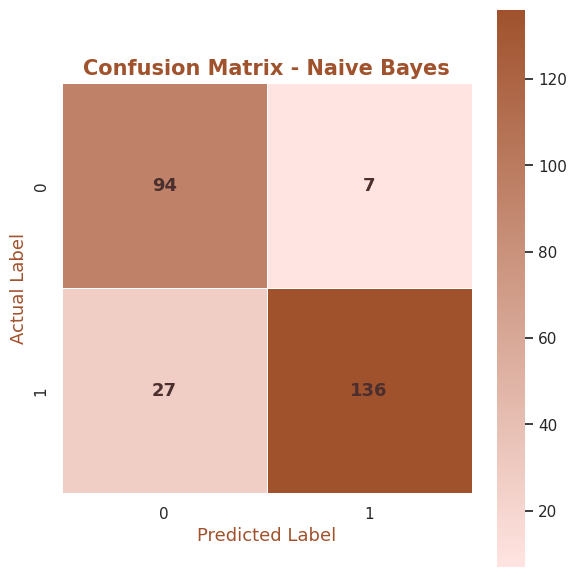

In [120]:
print(f"Akurasi Naive Bayes: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\nClassification Report Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Membuat colormap dengan warna pink muda ke coklat
colors = ["#FFE4E1", "#A0522D"]  # light pink to sienna
cmap_custom = LinearSegmentedColormap.from_list("custom_brown", colors)

plt.figure(figsize=(6,6))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt='d',
    cmap=cmap_custom,
    linewidths=0.7,
    linecolor='white',
    cbar=True,
    square=True,
    annot_kws={"size": 13, "weight": "bold", "color": "#4B2E2E"}  # coklat gelap
)
plt.title("Confusion Matrix - Naive Bayes", fontsize=15, fontweight='bold', color='#A0522D')
plt.xlabel("Predicted Label", fontsize=13, color='#A0522D')
plt.ylabel("Actual Label", fontsize=13, color='#A0522D')
plt.tight_layout()
plt.show()

##**Perbandingan Akurasi**

<ipython-input-121-f49cc7768947>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df_acc, x='Model', y='Accuracy', palette='viridis', edgecolor='black')


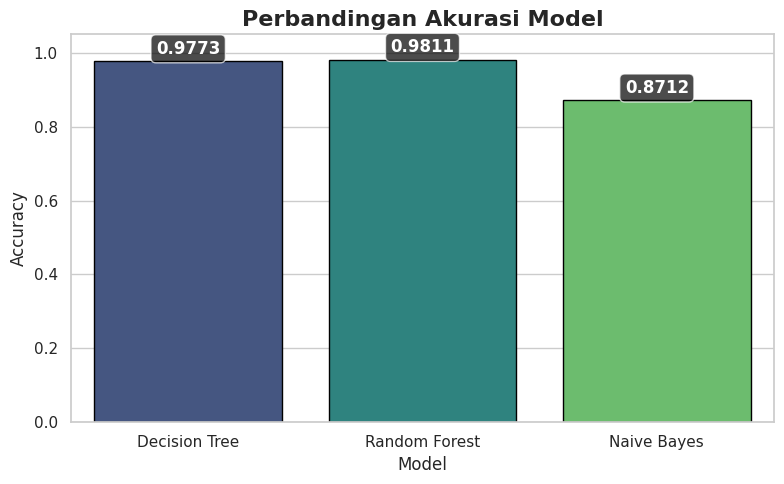

In [121]:
# Hitung akurasi
acc = {
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb)
}

# Buat DataFrame
df_acc = pd.DataFrame(acc.items(), columns=['Model', 'Accuracy'])

# Plot
plt.figure(figsize=(8, 5))
sns.set(style='whitegrid')
bar = sns.barplot(data=df_acc, x='Model', y='Accuracy', palette='viridis', edgecolor='black')

# Tambahkan label
for i, v in enumerate(df_acc['Accuracy']):
    bar.text(i, v + 0.02, f'{v:.4f}', ha='center', color='white', fontweight='bold',
             bbox=dict(facecolor='black', alpha=0.7, boxstyle='round,pad=0.3'))

plt.title('Perbandingan Akurasi Model', fontsize=16, fontweight='bold')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()